# Cytotrace analysis

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scvelo as scv
import cellrank as cr

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [2]:
Path='/home/mgander/pancreas_multiome/data2'
adata=sc.read_h5ad(f'{Path}/Lung_adata.h5ad')
adata

AnnData object with n_obs × n_vars = 88729 × 3000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'sort_batch', 'Cell_type', 'n_counts', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'conditions_combined', 'day', 'leiden'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'derive_colors', 'hvg', 'leiden', 'leiden_colors', 'level_1_colors', 'level_2_colors', 'neighbors', 'umap'
    obsm: 'X_scPoli', 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

# Analysis

In [3]:
scv.pp.moments(adata)

Normalized count data: X, spliced, unspliced.
computing neighbors
    finished (0:02:16) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:55) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [4]:
from cellrank.kernels import CytoTRACEKernel

ck = CytoTRACEKernel(adata).compute_cytotrace()

In [7]:
ck.compute_transition_matrix(threshold_scheme="soft", nu=0.5)

  0%|          | 0/88729 [00:00<?, ?cell/s]

CytoTRACEKernel[n=88729, dnorm=False, scheme='soft', b=10.0, nu=0.5]

In [8]:
import pickle
tm=ck.transition_matrix
with open(f'{Path}/cyto_lung.pkl', 'wb') as handle:
    pickle.dump(tm, handle, protocol=pickle.HIGHEST_PROTOCOL)

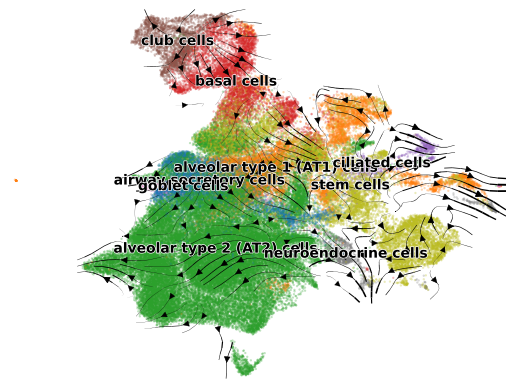

In [10]:
ck.plot_projection(basis='X_umap', color="level_2", recompute=True, title='')